In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import openpyxl
!pip install openpyxl
data=pd.read_excel("../input/acceptability-of-a-car/car_data1.xlsx")

     |████████████████████████████████| 242 kB 3.1 MB/s            


In [3]:
data.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [5]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()

data["buying"]=le1.fit_transform(data["buying"])
data["maint"]=le2.fit_transform(data["maint"])
data["doors"]=le3.fit_transform(data["doors"])
data["persons"]=le4.fit_transform(data["persons"])
data["lug_boot"]=le5.fit_transform(data["lug_boot"])
data["safety"]=le6.fit_transform(data["safety"])
data["class"]=le7.fit_transform(data["class"])

In [7]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [9]:
features=data.drop("class", axis=1)
target=data["class"]

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 6)
(432, 6)
(1296,)
(432,)


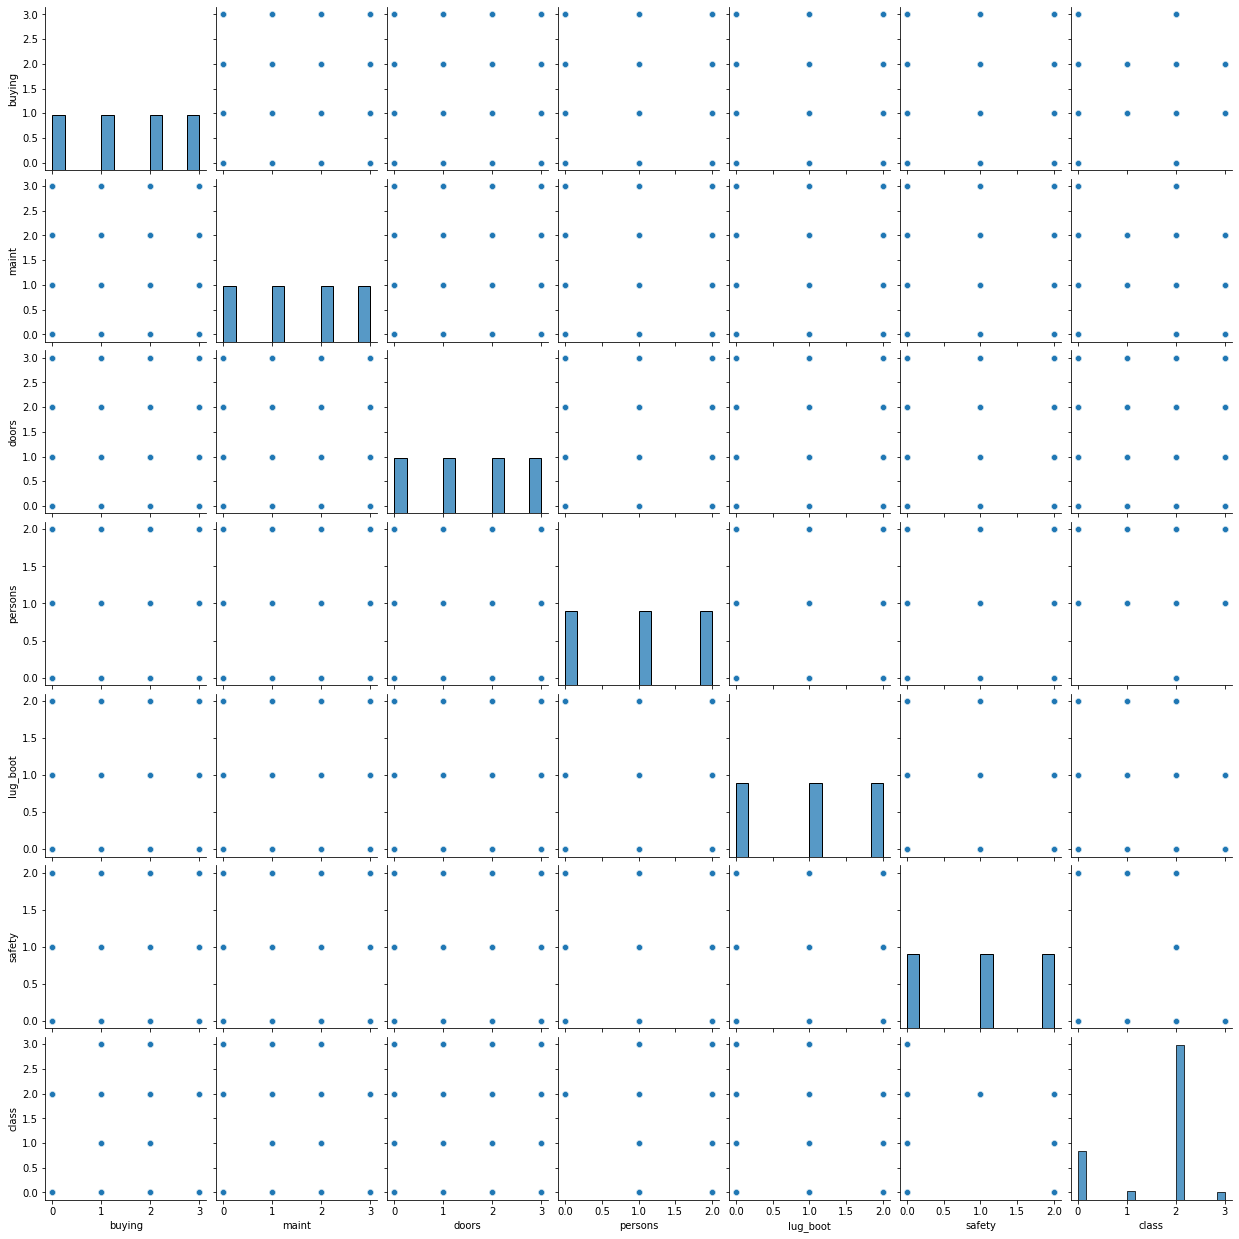

In [12]:
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Correlation')

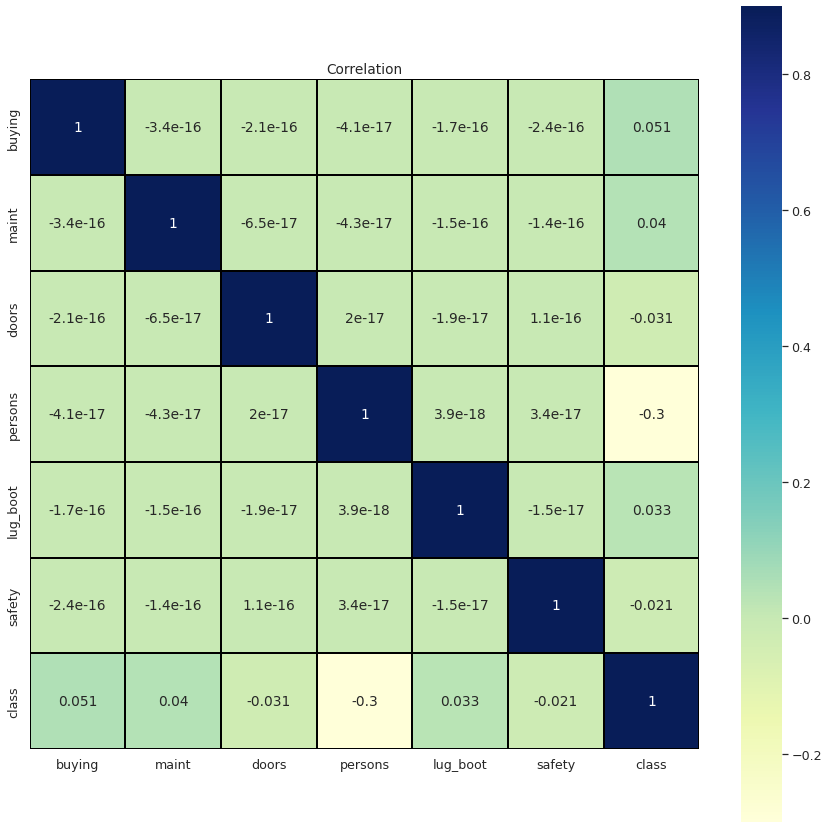

In [13]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(),  vmax=0.9, linewidths=0.02,
           square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Correlation')

In [14]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

DT.fit(x_train,y_train)
y_predDT=DT.predict(x_test)

from sklearn.metrics import accuracy_score
acc_DT=accuracy_score(y_predDT,y_test)
acc_DT 

0.9791666666666666

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[1,2,3,None],
    'min_samples_leaf': [7,8,9,10]
}
gs = GridSearchCV(DT, param_grid = param_grid, cv=2, verbose=0)
gs.fit(features,target)

print(gs.best_params_)
acc_DTG=gs.best_score_
acc_DTG

{'max_depth': 2, 'min_samples_leaf': 7}


0.7690972222222223

In [16]:
from math import sqrt
sqrt(data.shape[0])

41.569219381653056

In [17]:
sqrt(x_train.shape[0])

36.0

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=35) 
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_predknn,y_test)
acc_knn

0.7870370370370371

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors':[35,37,39,41,43],
}
gs2 = GridSearchCV(KNN, param_grid = param_grid, cv=2, verbose=0)
gs2.fit(features,target)

print(gs2.best_params_)
acc_KNNG=gs2.best_score_
acc_KNNG

{'n_neighbors': 39}


0.6892361111111112

In [20]:
from sklearn.svm import SVC
sv=SVC()

sv.fit(x_train,y_train)
y_predV=sv.predict(x_test)

from sklearn.metrics import accuracy_score
acc_sv=accuracy_score(y_predV,y_test)
acc_sv

0.9236111111111112

In [21]:
from sklearn.naive_bayes import CategoricalNB
CNB=CategoricalNB()

CNB.fit(x_train,y_train)
y_predC=CNB.predict(x_test)

from sklearn.metrics import accuracy_score
acc_CNB=accuracy_score(y_predC,y_test)
acc_CNB

0.8726851851851852

In [22]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,150,200,250],
    'max_depth': [None,1,2,3],
    'min_samples_leaf': [3,4,5,6]
}
gsF = GridSearchCV(RFC, param_grid = param_grid, cv=3, verbose=0)
gsF.fit(features,target)

print(gsF.best_params_)
acc_RFG=gsF.best_score_
acc_RFG

{'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 100}


0.7899305555555557

In [23]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()

from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=10,  shuffle=True)

results =cross_val_score(model,features,target, cv=kfold)
print(results)
acc_ADB=results.mean()
acc_ADB

[0.71098266 0.78034682 0.75144509 0.79190751 0.74566474 0.78034682
 0.79190751 0.78612717 0.77906977 0.80232558]


0.7720123672536631

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
model2=GradientBoostingClassifier()

from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=10,  shuffle=True)

results =cross_val_score(model2,features,target, cv=kfold)
print(results)
acc_GBC=results.mean()
acc_GBC

[0.98265896 0.97687861 0.98265896 0.98843931 0.95953757 0.97109827
 0.99421965 1.         0.98255814 0.98837209]


0.9826421562037908

In [25]:
from xgboost import XGBClassifier
model3=XGBClassifier()

from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=10,  shuffle=True)

results =cross_val_score(model3,features,target, cv=kfold)
print(results)
acc_XGB=results.mean()
acc_XGB

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.98843931 0.98843931 1.         0.99421965 1.         1.
 1.         0.99421965 0.98255814 1.        ]


0.9947876058610028

In [26]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

RFC.fit(x_train,y_train)
y_predRFC=RFC.predict(x_test)

from sklearn.metrics import accuracy_score
acc_RFC=accuracy_score(y_predRFC,y_test)
acc_RFC

0.9768518518518519

In [27]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()


BNB.fit(x_train,y_train)
y_predB=BNB.predict(x_test)

from sklearn.metrics import accuracy_score
acc_BNB=accuracy_score(y_predB,y_test)
acc_BNB

0.7893518518518519

In [28]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()

MNB.fit(x_train,y_train)
y_predM=MNB.predict(x_test)

from sklearn.metrics import accuracy_score
acc_MNB=accuracy_score(y_predM,y_test)
acc_MNB

0.7175925925925926

In [29]:
from sklearn.svm import LinearSVC
sv=LinearSVC()

sv.fit(x_train,y_train)
y_predV=sv.predict(x_test)

from sklearn.metrics import accuracy_score
acc_lsv=accuracy_score(y_predV,y_test)
acc_lsv

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.7037037037037037

In [30]:
from sklearn.naive_bayes import ComplementNB
PNB=ComplementNB()

PNB.fit(x_train,y_train)
y_predP=PNB.predict(x_test)

from sklearn.metrics import accuracy_score
acc_PNB=accuracy_score(y_predP,y_test)
acc_PNB

0.6527777777777778

In [31]:
compartion=pd.DataFrame({
    "Model_no":["model_1","model_2","model_3","model_4","model_5","model_6","model_7","model_8","model_9","model_10",
                "model_11","model_12","model_13","model_14","model_15"],
    
    "Algorithm":["DecisionTreeClassifier","DecisionTreeClassifier","KNeighborsClassifier(k=35)","KNeighborsClassifier(k=39)"
                 ,"LinearSVC","SVC","ComplementNB","MultinomialNB","BernoulliNB","CategoricalNB","RandomForestClassifier",
                 "RandomForestClassifier","AdaBoostClassifier","GradientBoostingClassifier","XGBClassifier"],
    
    "Model selection":["train_test_split","GridSearchCV","train_test_split","GridSearchCV","train_test_split",
                       "train_test_split","train_test_split","train_test_split","train_test_split","train_test_split",
                       "train_test_split","GridSearchCV","KFold & cross_val_score","KFold & cross_val_score",
                       "KFold & cross_val_score"],
    
    "Accuracy":[acc_DT, acc_DTG, acc_knn, acc_KNNG, acc_lsv, acc_sv, acc_PNB, acc_MNB, acc_BNB, acc_CNB, acc_RFC,
                acc_RFG, acc_ADB, acc_GBC, acc_XGB]
})

In [32]:
compartion

,Model_no,Algorithm,Model selection,Accuracy
0,model_1,DecisionTreeClassifier,train_test_split,0.979167
1,model_2,DecisionTreeClassifier,GridSearchCV,0.769097
2,model_3,KNeighborsClassifier(k=35),train_test_split,0.787037
3,model_4,KNeighborsClassifier(k=39),GridSearchCV,0.689236
4,model_5,LinearSVC,train_test_split,0.703704
5,model_6,SVC,train_test_split,0.923611
6,model_7,ComplementNB,train_test_split,0.652778
7,model_8,MultinomialNB,train_test_split,0.717593
8,model_9,BernoulliNB,train_test_split,0.789352
9,model_10,CategoricalNB,train_test_split,0.872685


#### maybe the following models are overfitted { model_1 , model_11  ,model_14 , model_15 }
